In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
data_full = pd.read_csv('/Users/carolchen/Desktop/bank-full.csv')
data_full.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [6]:
col=str(data_full.columns[0])
columns=col.split(';')
columns

['age',
 '"job"',
 '"marital"',
 '"education"',
 '"default"',
 '"balance"',
 '"housing"',
 '"loan"',
 '"contact"',
 '"day"',
 '"month"',
 '"duration"',
 '"campaign"',
 '"pdays"',
 '"previous"',
 '"poutcome"',
 '"y"']

In [7]:
columns=[re.sub('[^a-zA-Z0-9]+', '', column) for column in columns]
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
data_lst=[]
for val in range(0,len(data_full.values)):
    ele = data_full.values[val][0]#.replace('-','0')

    data_lst.append([re.sub('[^a-zA-Z0-9//-]+', ',', ele)])

In [9]:
df_chk=pd.DataFrame(data_lst)
df_chk.columns=['unified']
df_chk.head()

,unified
0,"58,management,married,tertiary,no,2143,yes,no,..."
1,"44,technician,single,secondary,no,29,yes,no,un..."
2,"33,entrepreneur,married,secondary,no,2,yes,yes..."
3,"47,blue-collar,married,unknown,no,1506,yes,no,..."
4,"33,unknown,single,unknown,no,1,no,no,unknown,5..."


In [10]:
df = df_chk.join(df_chk['unified'].str.split(',', expand=True).add_prefix('unified'))
df=df.drop(['unified','unified17'], axis=1)
df.columns=columns

In [11]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df.month.unique()
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [14]:
df.shape

(45211, 17)

In [15]:
data_full2 = pd.read_csv('/Users/carolchen/Desktop/bank-full.csv',sep=';')
data_full2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
data_full2.shape

(45211, 17)

In [17]:
data_full2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
cat_columns = [column for column in data_full2.columns if data_full2[column].dtype=='O']
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [19]:
coumn_unique_value={}
for column in cat_columns:
    coumn_unique_value[column]=data_full2[column].unique()

In [20]:
coumn_unique_value

{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [21]:
# Visualization

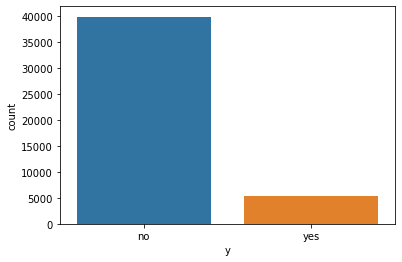

In [22]:
sns.countplot(data_full2['y'])
plt.show()

<AxesSubplot:>

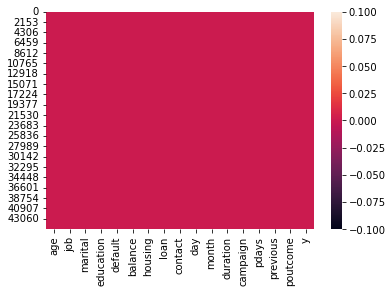

In [23]:
sns.heatmap(data_full2.isnull(),cbar='viridis')

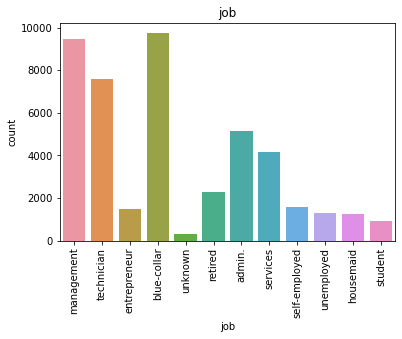

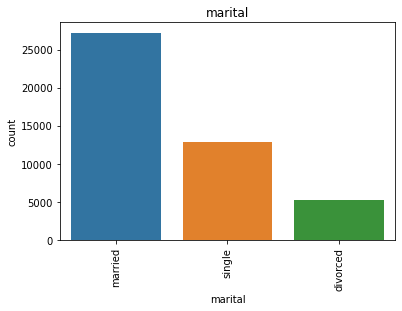

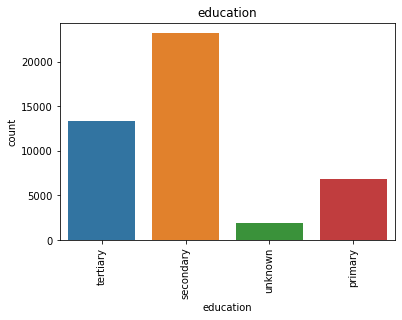

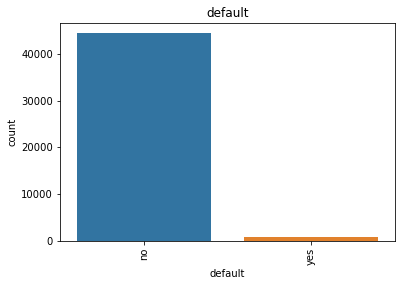

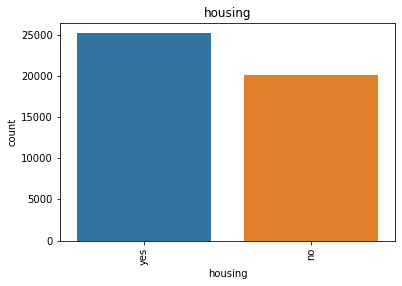

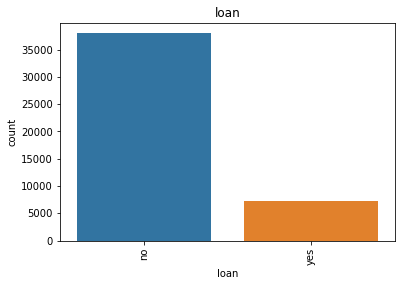

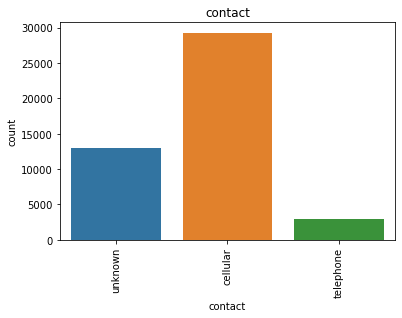

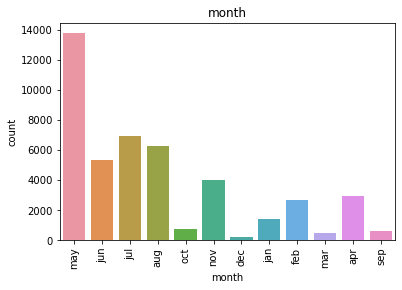

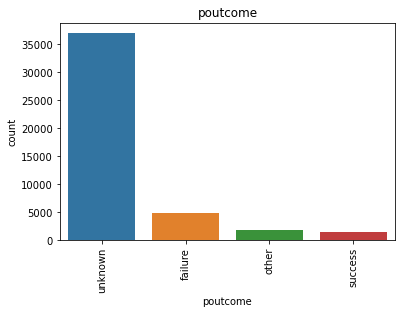

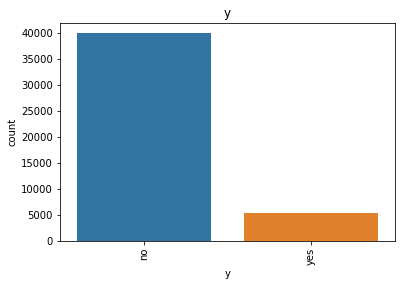

In [24]:
for columns in cat_columns:
    sns.countplot(data_full2[columns])
    plt.title(columns)
    plt.xticks(rotation=90)
    plt.show()

In [25]:
data_full2['default']=data_full2['default'].replace({'yes':1,'no':0}).astype(int)
data_full2['housing']=data_full2['housing'].replace({'yes':1,'no':0}).astype(int)
data_full2['loan']=data_full2['loan'].replace({'yes':1,'no':0}).astype(int)
data_full2['y']=data_full2['y'].replace({'yes':1,'no':0}).astype(int)

In [26]:
cat_columns1 = [column for column in data_full2.columns if data_full2[column].dtype=='O']

In [27]:
data_full2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [28]:
data_full2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [29]:
for column in cat_columns1:
    col  = pd.get_dummies(data_full2[column], drop_first=True)
    data_full2 = pd.concat([col,data_full2],axis=1)
    data_full2=data_full2.drop(column, axis=1)

In [30]:
data_full2.head()

,other,success,unknown,aug,dec,feb,jan,jul,jun,mar,...,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,0,0,1,0,0,0,0,0,0,0,...,0,2143,1,0,5,261,1,-1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,29,1,0,5,151,1,-1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,2,1,1,5,76,1,-1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1506,1,0,5,92,1,-1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,5,198,1,-1,0,0


In [31]:
y=data_full2['y']
X=data_full2.drop('y',axis=1)

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote=SMOTE(random_state=0)

In [35]:
X_smot, Y_smot = smote.fit_resample(X.values,y)

In [36]:
X_smot_df=pd.DataFrame(X_smot,columns=X.columns)

In [37]:
Y_smot.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smot_df,Y_smot,random_state=0, test_size=0.2)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((63875, 42), (63875,), (15969, 42), (15969,))

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [44]:
confusion_matrix(y_test,y_pred)

array([[7461,  440],
       [ 457, 7611]])

In [45]:
accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)

(0.9438286680443359, 0.9453484039249782, 0.9433564700049578)